In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
#Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
#Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
#Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [20]:
#Support Vector Regressor

In [21]:
from sklearn.svm import SVR

In [22]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [25]:
#MODEL EVALUATION

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
models = [lr_model, dt_model, rf_model, gb_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']


In [28]:
for model in models:
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model.__class__.__name__} - MSE: {mse}, MAE: {mae}, R²: {r2}")

LinearRegression - MSE: 176760096.86163726, MAE: 7280.667793128897, R²: -1.239056167801365
DecisionTreeRegressor - MSE: 10873799.443460707, MAE: 2090.3821219512197, R²: 0.8622593665448491
RandomForestRegressor - MSE: 3612714.304790342, MAE: 1361.4021463414635, R²: 0.9542370116883511
GradientBoostingRegressor - MSE: 5309502.67143241, MAE: 1657.7071562730994, R²: 0.9327434476700114
SVR - MSE: 86995432.34816086, MAE: 5707.167500006647, R²: -0.10198886981924526


In [29]:
import matplotlib.pyplot as plt

In [31]:
import numpy as np

In [32]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

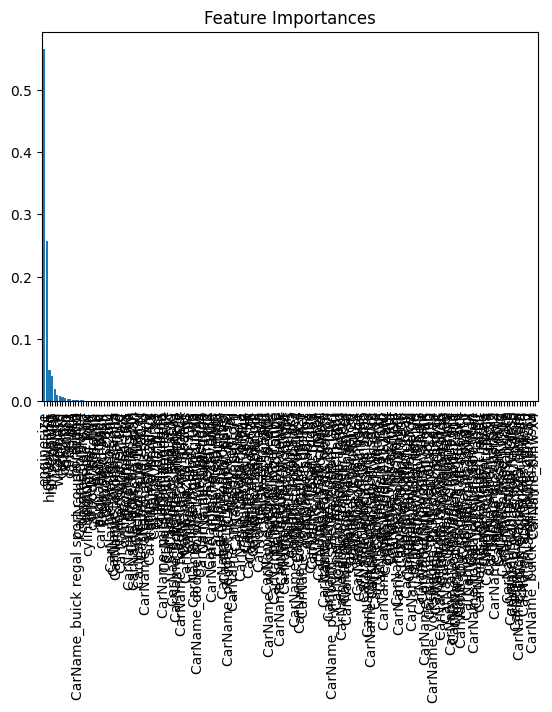

In [35]:
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}


In [38]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)